<a href="https://colab.research.google.com/github/Ishank2301/Comprehensive-ML-Handbook/blob/main/Random_Weights_Initialization(Small).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries:

In [53]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons
import seaborn as sns

# Create a valid Dataset:

In [54]:
X, y = make_moons(n_samples=100, noise=0.2, random_state=1)

<Axes: >

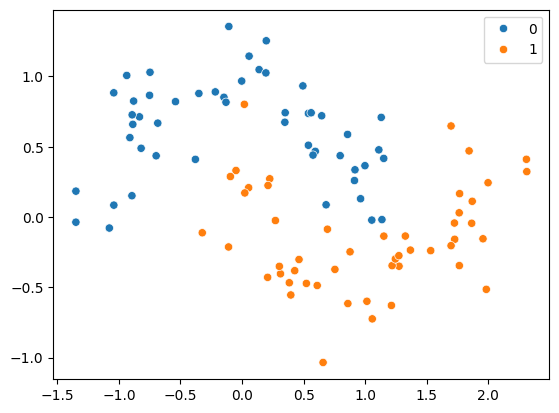

In [55]:
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)

# Create a ANN Model:

# For activation function "Sigmoid":

In [69]:
model = Sequential()

model.add(Dense(2, input_dim=2, activation='tanh'))
model.add(Dense(2,  activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

In [70]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_15 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 2)              │             6 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 15 (60.00 B)

 Trainable params: 15 (60.00 B)

 Non-trainable params: 0 (0.00 B)

In [71]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [72]:
callback = EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=True
)

In [73]:
# Initializng the Model on X,y and validation split of an 20%.
history = model.fit(X, y, validation_split=0.2, epochs=3500, verbose=1,callbacks=callback)

Epoch 1/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 114ms/step - accuracy: 0.6031 - loss: 0.6563 - val_accuracy: 0.9000 - val_loss: 0.5623
Epoch 2/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - accuracy: 0.6211 - loss: 0.6486 - val_accuracy: 0.9500 - val_loss: 0.5617
Epoch 3/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6211 - loss: 0.6482 - val_accuracy: 0.9500 - val_loss: 0.5611
Epoch 4/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.6633 - loss: 0.6429 - val_accuracy: 0.9500 - val_loss: 0.5605
Epoch 5/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.6656 - loss: 0.6477 - val_accuracy: 0.9500 - val_loss: 0.5599
Epoch 6/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step - accuracy: 0.6977 - loss: 0.6330 - val_accuracy: 0.9500 - val_loss: 0.5593
Epoch 7/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step - accuracy: 0.7234 - loss: 0.6249 - val_accuracy: 0.9500 - val_loss: 0.5586
Epoch 8/3500
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.7320 - loss: 0.6295 - val_accuracy: 0.9500 - 

# Setting base parameters to :

1.   Random Values
2.   Random Values Must be small in this case.



In [74]:
model.get_weights()

[array([[ 0.46034843, -0.14376938],
        [-1.4883881 ,  0.834012  ]], dtype=float32),
 array([ 0.12625378, -0.09347712], dtype=float32),
 array([[-1.615456  , -0.24013722],
        [ 0.018373  ,  1.098793  ]], dtype=float32),
 array([-0.03753596, -0.05096827], dtype=float32),
 array([[-1.6937298],
        [-0.6661327]], dtype=float32),
 array([0.0797326], dtype=float32)]

In [75]:
initial_weights = model.get_weights()
initial_weights[0] = np.random.rand(*model.get_weights()[0].shape) * 0.001
initial_weights[1] = np.zeros(model.get_weights()[1].shape)
initial_weights[2] = np.random.rand(*model.get_weights()[2].shape) * 0.001
initial_weights[3] = np.zeros(model.get_weights()[3].shape)
initial_weights[4] = np.random.rand(*model.get_weights()[4].shape) * 0.001
initial_weights[5] = np.zeros(model.get_weights()[5].shape)

In [76]:
model.set_weights(initial_weights)
model.get_weights()

[array([[0.00092643, 0.00077419],
        [0.00066286, 0.00021897]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.00015754, 0.00040018],
        [0.00026439, 0.0009651 ]], dtype=float32),
 array([0., 0.], dtype=float32),
 array([[0.00025673],
        [0.00082758]], dtype=float32),
 array([0.], dtype=float32)]

# Now let's create a model for these Weights:

# Activation Function as Sigmoid:

In [77]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [78]:
history = model.fit(X, y, validation_split=0.2, epochs=200, callbacks=callback)

Epoch 1/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 113ms/step - accuracy: 0.4781 - loss: 0.6931 - val_accuracy: 0.3500 - val_loss: 0.6935
Epoch 2/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5695 - loss: 0.6930 - val_accuracy: 0.3500 - val_loss: 0.6936
Epoch 3/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5070 - loss: 0.6931 - val_accuracy: 0.3500 - val_loss: 0.6938
Epoch 4/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5266 - loss: 0.6930 - val_accuracy: 0.3500 - val_loss: 0.6939
Epoch 5/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.5188 - loss: 0.6930 - val_accuracy: 0.3500 - val_loss: 0.6941
Epoch 6/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.5305 - loss: 0.6929 - val_accuracy: 0.3500 - val_loss: 0.6943
Epoch 7/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - accuracy: 0.4914 - loss: 0.6932 - val_accuracy: 0.3500 - val_loss: 0.6945
Epoch 8/200
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - accuracy: 0.5500 - loss: 0.6927 - val_accuracy: 0.3500 - val_loss

# Observing the model Data:

In [79]:
model.get_weights()

[array([[ 1.1141349e-03,  1.1567213e-03],
        [ 5.5214169e-04, -9.7148513e-06]], dtype=float32),
 array([1.4661399e-05, 3.6427518e-05], dtype=float32),
 array([[0.00024228, 0.00062013],
        [0.00037351, 0.00123209]], dtype=float32),
 array([0.00141555, 0.00185943], dtype=float32),
 array([[0.00067034],
        [0.00131428]], dtype=float32),
 array([0.00225714], dtype=float32)]

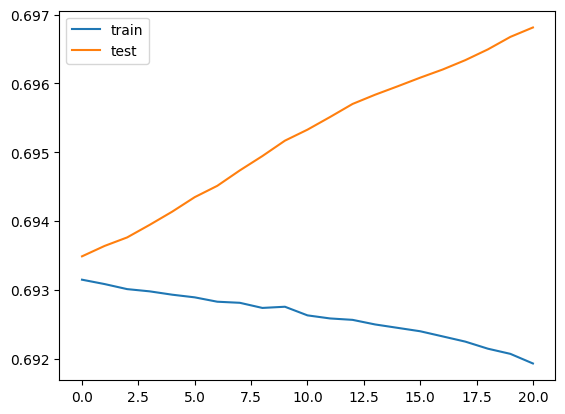

In [80]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


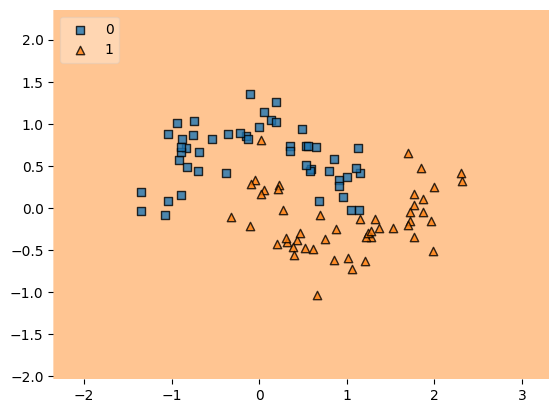

In [81]:
plot_decision_regions(X, y.ravel(), clf = model, legend=2)
plt.show()

No trainig for Very small weights the neuron or hidden layers can't capture any trend